<a href="https://colab.research.google.com/github/uVictorA/LimpezaDeDados/blob/main/RegrasAssociacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

Saving csv_limpo (5).csv to csv_limpo (5).csv


In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [6]:
df = pd.read_csv("csv_limpo (5).csv")
df.head()

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca,total_esperado
0,24580,2020-12-11,18:58:39,LETICIA AUGUSTO NERY SILVA,farinha de trigo,3.21,1,14.21,Separando,coronel xavier chaves,MG,BRASIL,36330-000,11.0,Pix,victor,dona benta,14.21
1,1795,2013-12-31,18:02:01,RÔMULO DA SILVA BIANQUINI,condicionador,8.59,14,120.26,Entregue,tiradentes,MG,BRASIL,36325-000,0.0,Pix,paulo souza roncete,seda,120.26
2,1066,2017-09-02,17:15:46,LUCAS HUGO CAZULA PEREIRA,pao de forma,5.02,9,45.18,Aguardando pagamento,simão pereira,MG,BRASIL,36123-000,0.0,Transferência bancária,paulo souza roncete,nutrella,45.18
3,35976,2021-01-20,05:49:47,JOÃO BRENO PRADO SILVA,leite integral,3.20,8,25.60,Separando,santana do garambéu,MG,BRASIL,36196-000,0.0,Cartão de crédito,carlos queiroz de aguiar,elege,25.60
4,46073,2019-01-17,20:51:06,PEDRO SILVA RAMOS,manteiga,8.98,10,89.80,Em transporte,nova iguaçu,RJ,BRASIL,26000-000,0.0,Cartão de crédito,felipe henrique costa barnabe marazo,itambe,89.80


In [7]:
transactions = df.groupby('id_da_compra')['produto'].apply(list)

In [8]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)


In [9]:
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

In [10]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [11]:
rules = rules.sort_values(by='lift', ascending=False)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

           antecedents         consequents   support  confidence      lift
12          (manteiga)          (macarrao)  0.021909    0.150449  1.022201
13          (macarrao)          (manteiga)  0.021909    0.148856  1.022201
23        (detergente)      (desinfetante)  0.021490    0.147590  1.021377
22      (desinfetante)        (detergente)  0.021490    0.148719  1.021377
8       (papel toalha)      (pao de forma)  0.021658    0.148843  1.020350
9       (pao de forma)      (papel toalha)  0.021658    0.148467  1.020350
31             (arroz)  (queijo mussarela)  0.021658    0.147957  1.015678
30  (queijo mussarela)             (arroz)  0.021658    0.148672  1.015678
27      (papel toalha)      (desinfetante)  0.021222    0.145850  1.009336
26      (desinfetante)      (papel toalha)  0.021222    0.146864  1.009336


In [12]:
import matplotlib.pyplot as plt

In [13]:
pd.set_option('display.max_rows', 100)  # Altere esse valor para mostrar mais ou menos
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

           antecedents         consequents   support  confidence      lift
12          (manteiga)          (macarrao)  0.021909    0.150449  1.022201
13          (macarrao)          (manteiga)  0.021909    0.148856  1.022201
23        (detergente)      (desinfetante)  0.021490    0.147590  1.021377
22      (desinfetante)        (detergente)  0.021490    0.148719  1.021377
8       (papel toalha)      (pao de forma)  0.021658    0.148843  1.020350
9       (pao de forma)      (papel toalha)  0.021658    0.148467  1.020350
31             (arroz)  (queijo mussarela)  0.021658    0.147957  1.015678
30  (queijo mussarela)             (arroz)  0.021658    0.148672  1.015678
27      (papel toalha)      (desinfetante)  0.021222    0.145850  1.009336
26      (desinfetante)      (papel toalha)  0.021222    0.146864  1.009336
24      (desinfetante)      (pao de forma)  0.021256    0.147096  1.008376
25      (pao de forma)      (desinfetante)  0.021256    0.145711  1.008376
32            (acucar)   

In [14]:
rules.to_csv('regras_associacao.csv', index=False)
print("\nRegras salvas em: regras_associacao.csv")


Regras salvas em: regras_associacao.csv


In [16]:
import seaborn as sns


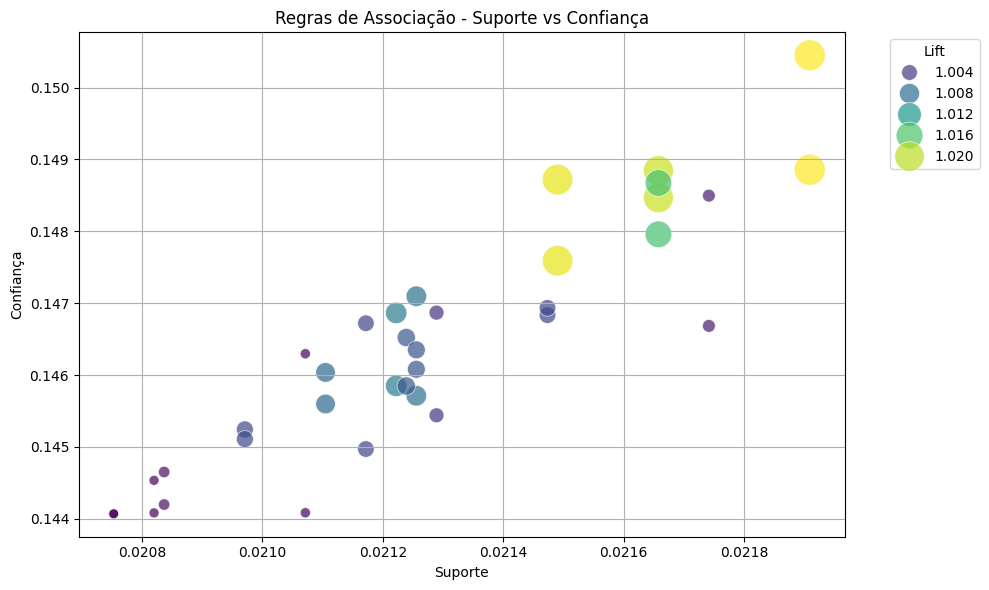

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis', sizes=(50, 500), alpha=0.7)
plt.title('Regras de Associação - Suporte vs Confiança')
plt.xlabel('Suporte')
plt.ylabel('Confiança')
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-18-34ecbf14ec68>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rules, x='lift', y=top_rules['antecedents'].astype(str) + " → " + top_rules['consequents'].astype(str), palette="magma")


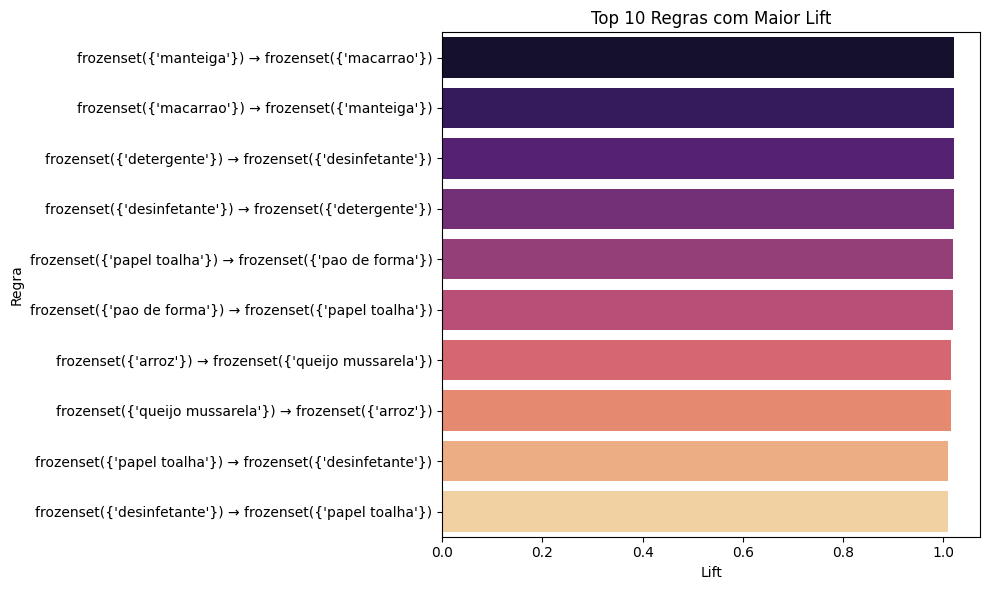

In [18]:
top_rules = rules.nlargest(10, 'lift')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_rules, x='lift', y=top_rules['antecedents'].astype(str) + " → " + top_rules['consequents'].astype(str), palette="magma")
plt.title('Top 10 Regras com Maior Lift')
plt.xlabel('Lift')
plt.ylabel('Regra')
plt.tight_layout()
plt.show()

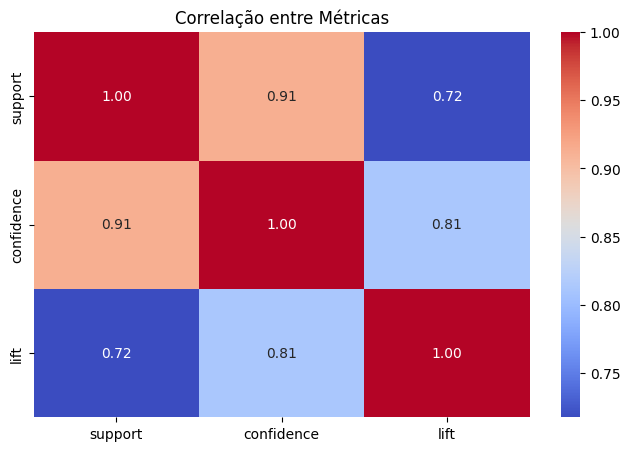

In [20]:
metrics = rules[['support', 'confidence', 'lift']]
plt.figure(figsize=(8, 5))
sns.heatmap(metrics.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre Métricas")
plt.show()

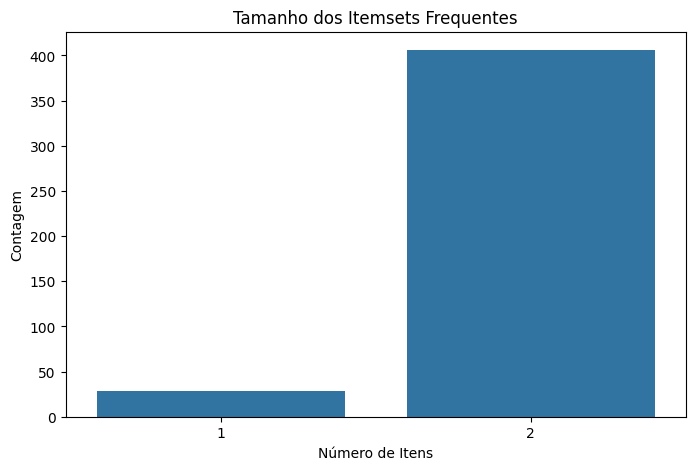

In [23]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
plt.figure(figsize=(8,5))
sns.countplot(x='length', data=frequent_itemsets)
plt.title('Tamanho dos Itemsets Frequentes')
plt.xlabel('Número de Itens')
plt.ylabel('Contagem')
plt.show()

In [25]:
import networkx as nx

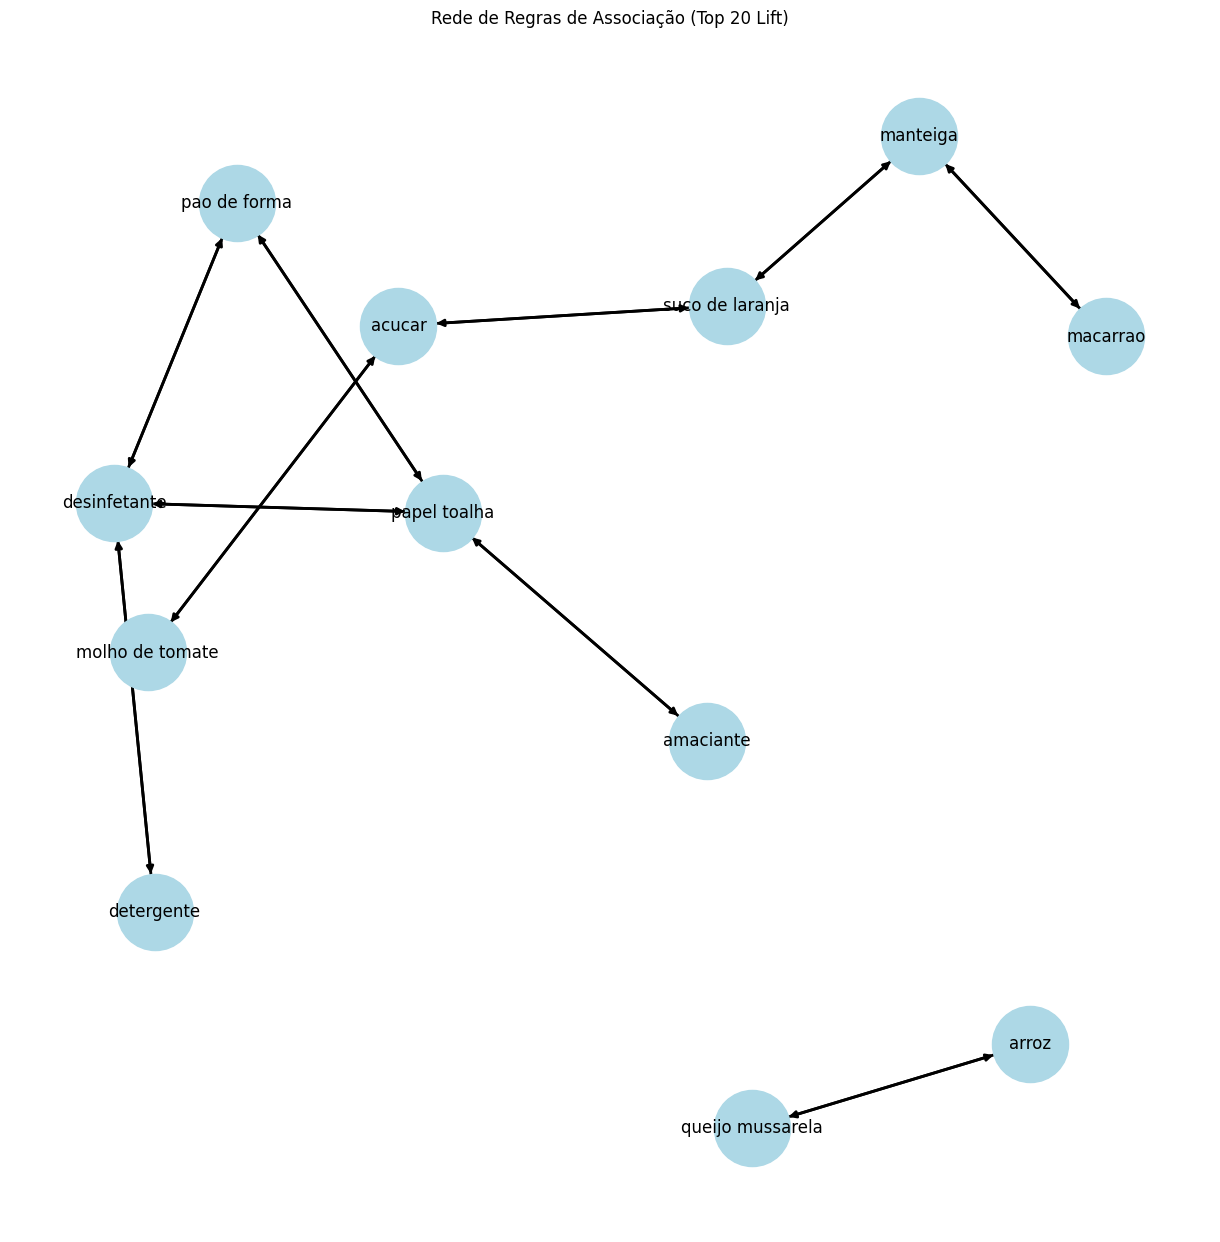

In [26]:
top = rules.head(20)
G = nx.DiGraph()
for _, r in top.iterrows():
    for a in r['antecedents']:
        for c in r['consequents']:
            G.add_edge(a, c, weight=r['lift'])
pos = nx.spring_layout(G, k=1, seed=42)
plt.figure(figsize=(12,12))
weights = [d['weight']*2 for (_,_,d) in G.edges(data=True)]
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', width=weights)
plt.title('Rede de Regras de Associação (Top 20 Lift)')
plt.show()

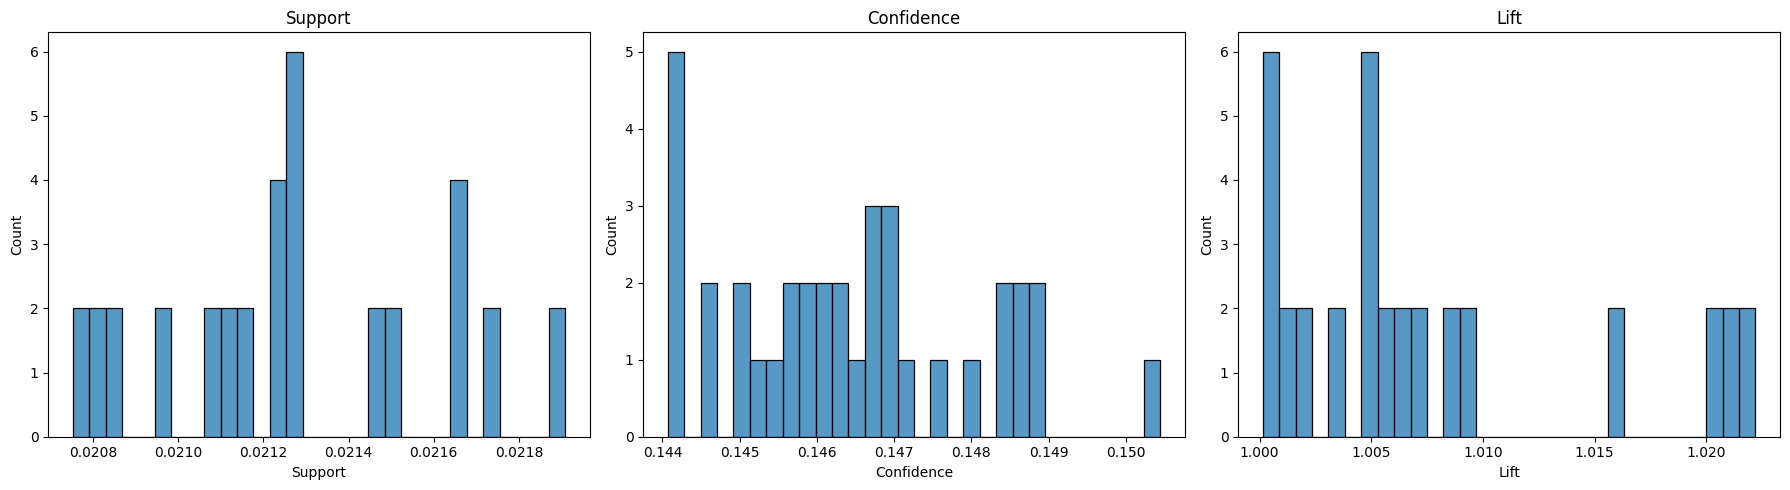

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rules['support'], bins=30, ax=axes[0]).set(title='Support', xlabel='Support')
sns.histplot(rules['confidence'], bins=30, ax=axes[1]).set(title='Confidence', xlabel='Confidence')
sns.histplot(rules['lift'], bins=30, ax=axes[2]).set(title='Lift', xlabel='Lift')
plt.tight_layout()
plt.show()

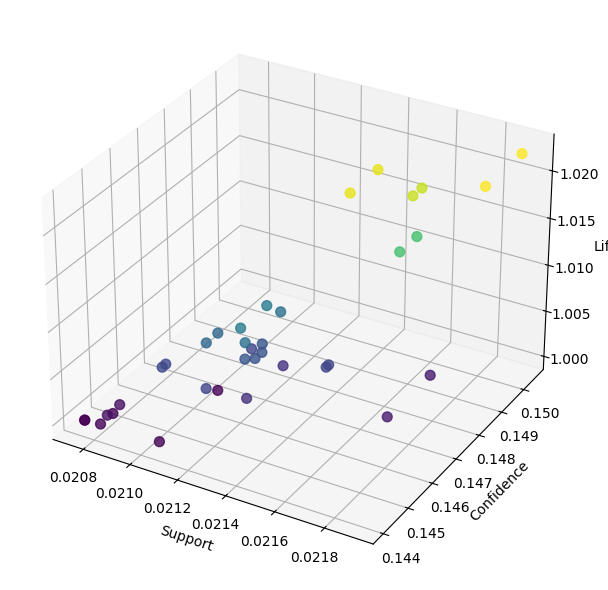

In [28]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rules['support'], rules['confidence'], rules['lift'],
           c=rules['lift'], cmap='viridis', s=50, alpha=0.8)
ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')
plt.tight_layout()
plt.show()

In [31]:
from pandas.plotting import parallel_coordinates